In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Attribute Information:
•	invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.

•	customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.

•	gender: String variable of the customer's gender.

•	age: Positive Integer variable of the customers age.

•	category: String variable of the category of the purchased product.

•	quantity: The quantities of each product (item) per transaction. Numeric.

•	price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).

•	payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.

•	invoice_date: Invoice date. The day when a transaction was generated.

•	shopping_mall: String variable of the name of the shopping mall where the transaction was made.


In [2]:
dfcust = pd.read_csv('customer_shopping_data.csv')
dfcust

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
dfcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
# convert date column to pandas datetime format
dfcust["invoice_date"] = pd.to_datetime(dfcust["invoice_date"], format="%d/%m/%Y")

In [5]:
# insert month column
dfcust['month'] = dfcust['invoice_date'].dt.month

In [7]:
dfcust

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,3


In [8]:
# duplicate check
dfcust.duplicated().sum()

0

In [9]:
# null value
dfcust.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
month             0
dtype: int64

In [10]:
dfcust.describe()

,age,quantity,price,month
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,6.113898
std,14.990054,1.413025,941.184567,3.569511
min,18.000000,1.000000,5.230000,1.000000
25%,30.000000,2.000000,45.450000,3.000000
50%,43.000000,3.000000,203.300000,6.000000
75%,56.000000,4.000000,1200.320000,9.000000
max,69.000000,5.000000,5250.000000,12.000000


In [11]:
#convert 'Quantity' dan 'Price' menjadi numerik
dfcust['quantity'] = pd.to_numeric(dfcust['quantity'])
dfcust['price'] = pd.to_numeric(dfcust['price'])

In [12]:
# insert sales column
dfcust['sales'] = dfcust['quantity']*dfcust['price']
dfcust.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,242.40


In [13]:
results = dfcust.groupby('month').sum()
results

,age,quantity,price,sales
month,,,,
1,501697,34763,7932626.63,28891525.59
2,454080,31343,7235297.32,26625090.10
3,379197,26224,6007346.21,21956191.33
4,325256,22558,5102478.76,18715685.98
5,335058,23217,5346926.82,19719331.10
6,329125,22674,5160345.74,18933775.30
7,340663,23699,5552023.57,20378722.63
8,330952,22921,5270542.03,19282361.29
9,320239,22098,5115214.27,18795794.91


<function matplotlib.pyplot.show(close=None, block=None)>

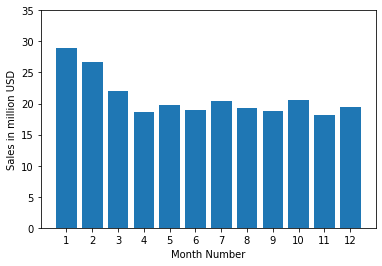

In [14]:
months = range(1,13) #untuk axis x

plt.bar(months, results['sales'])
plt.xticks(months)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Sales in million USD')
plt.xlabel('Month Number')
plt.show

Based on the monthly sales analysis, it can be concluded that the peak sales occurred in the first month, January. This indicates that during this month, there was a significant increase in the number of goods or services sold compared to other months throughout the year.

Then, the month with the lowest sales was the eleventh month, November. This suggests that there was a drastic decline in sales activity during this month.

In [15]:
results2 = dfcust.groupby('shopping_mall').sum()
results2

,age,quantity,price,month,sales
shopping_mall,,,,,
Cevahir AVM,215474,14949,3433671.84,30630,12645138.20
Emaar Square Mall,209575,14501,3390408.31,29696,12406100.29
Forum Istanbul,215380,14852,3336073.82,30057,12303921.24
Istinye Park,424335,29465,6717077.54,59577,24618827.68
Kanyon,862280,59457,13710755.24,121133,50554231.10
Mall of Istanbul,866333,60114,13851737.62,121710,50872481.68
Metrocity,652968,44894,10249980.07,92002,37302787.33
Metropol AVM,439086,30530,6937992.99,62002,25379913.19
Viaport Outlet,212771,14716,3414019.46,29995,12521339.72


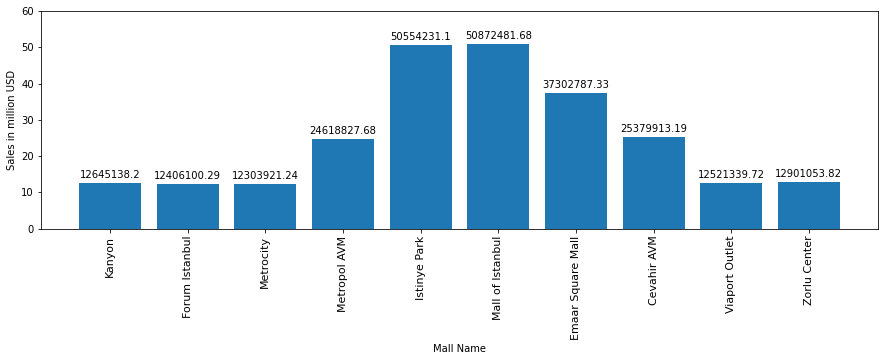

In [16]:
mall = dfcust['shopping_mall'].unique()

fig, ax = plt.subplots(figsize =(15, 4))
m=plt.bar(mall, results2['sales'])
plt.xticks(mall, rotation='vertical', size = 11)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Sales in million USD')
plt.xlabel('Mall Name')
plt.show

for bar in m:
   height = bar.get_height()
   ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
   textcoords="offset points", ha='center', va='bottom')

Based on the given data, Mall of Istanbul occupies the top position with the highest sales, followed closely by Istinye Park. On the other hand, Metrocity has the lowest sales among the malls.

In [17]:
Based on the given data, Mall of Istanbul occupies the top position with the highest sales, followed closely by Istinye Park. On the other hand, Metrocity has the lowest sales among the mallsdfcust.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,242.40


In [18]:
category_group=dfcust.groupby('category')
category_group.sum()

,age,quantity,price,month,sales
category,,,,,
Books,216882,14982,226977.30,30172,8.345529e+05
Clothing,1497054,103558,31075684.64,210869,1.139968e+08
Cosmetics,657937,45465,1848606.90,92388,6.792863e+06
Food & Beverage,640605,44277,231568.71,90800,8.495351e+05
Shoes,436027,30217,18135336.89,61094,6.655345e+07
Souvenir,216922,14871,174436.83,29900,6.358247e+05
Technology,216669,15021,15772050.00,30796,5.786235e+07
Toys,437032,30321,1086704.64,62051,3.980426e+06


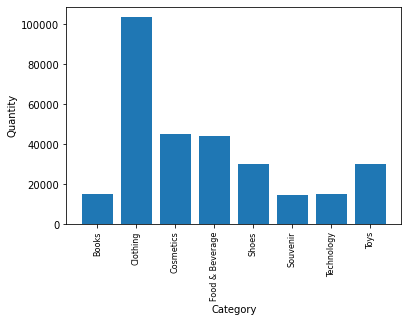

In [19]:
category_group = dfcust.groupby('category')
quantity_ordered = category_group.sum()['quantity']

categories = [category for category, df in category_group]

cat = plt.bar(categories, quantity_ordered)
plt.ylabel('Quantity')
plt.xlabel('Category')
plt.xticks(categories, rotation='vertical', size=8)
plt.show()

Based on the chart, the category with the highest sales is the clothing category. This indicates that among all categories analyzed, clothing products are the most popular and generate the most revenue.

In [20]:
gender = dfcust['gender'].value_counts().reset_index()
gender

,index,gender
0,Female,59482
1,Male,39975


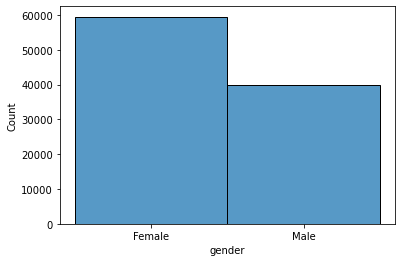

In [21]:
fig = plt.figure()  
ax = sns.histplot(data = dfcust, x='gender')
plt.show() 

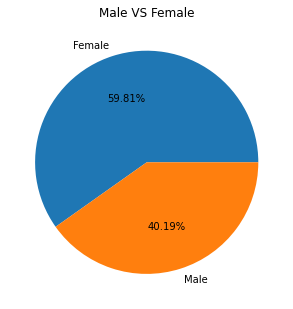

In [22]:
plt.figure(figsize=(5,8))
plt.pie(gender['gender'], labels=gender['index'], autopct='%1.2f%%')
plt.title('Male VS Female')
plt.show()

In [23]:
Gender_catergory = dfcust.groupby(['gender','category']).size().reset_index(name='count')
Gender_catergory

,gender,category,count
0,Female,Books,2906
1,Female,Clothing,20652
2,Female,Cosmetics,9070
3,Female,Food & Beverage,8804
4,Female,Shoes,5967
5,Female,Souvenir,3017
6,Female,Technology,2981
7,Female,Toys,6085
8,Male,Books,2075
9,Male,Clothing,13835


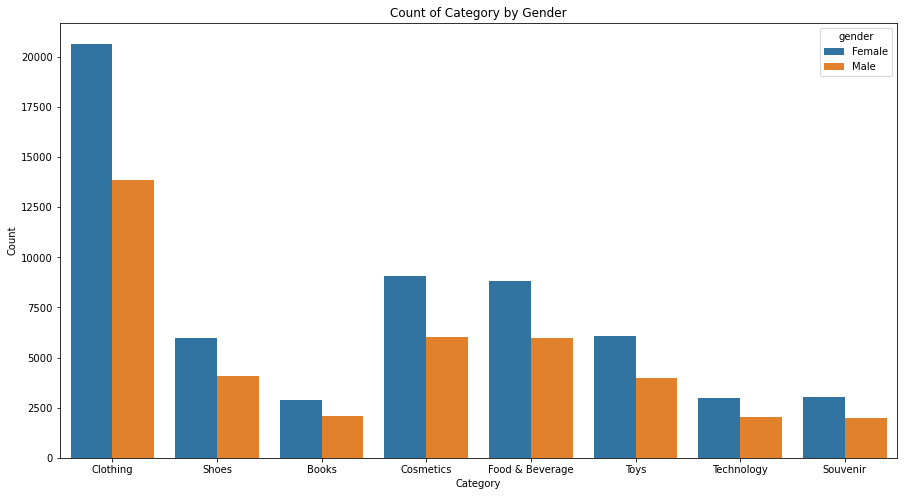

In [24]:
plt.figure(figsize=(15, 8))
sns.countplot(data=dfcust, x=dfcust['category'], hue=dfcust['gender'])
plt.title('Count of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Based on the chart, it is evident that clothing is the category of goods that is most frequently purchased by both women and men. Conversely, categories such as books, technology, and souvenirs are less frequently purchased.

In [26]:
Gender_age = dfcust.groupby('gender')['age'].mean().reset_index()
Gender_age

,gender,age
0,Female,43.453515
1,Male,43.387767


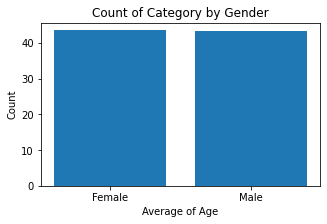

In [27]:
plt.figure(figsize=(5, 3))
plt.bar(Gender_age['gender'],Gender_age['age'])
plt.title('Count of Category by Gender')
plt.xlabel('Average of Age')
plt.ylabel('Count')
plt.show()

In [38]:
payment_methods = dfcust.groupby(['payment_method']).size().reset_index(name='count')
payment_methods

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


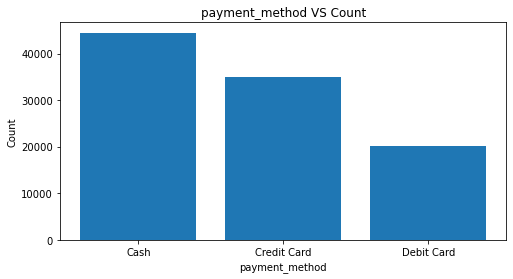

In [41]:
plt.figure(figsize=(8, 4))
plt.bar(payment_methods['payment_method'],payment_methods['count'])
plt.title('payment_method VS Count')
plt.xlabel('payment_method')
plt.ylabel('Count')
plt.show()

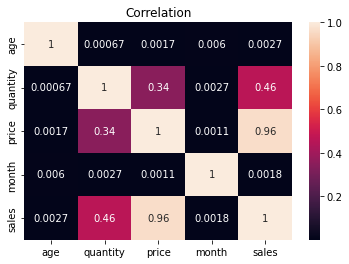

In [43]:
sns.heatmap(data=dfcust.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation')
plt.show()